In [8]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient

#rerun california randomizationsc



In [421]:
#### #user defined variables
JobIDint = 3152735
Clade = "birds"
extra_naming_info = "0507_ecoregions"
#was ecoregions
#ecoregionGENUS
ecoregion = True
ecoregion_code = "85"
username = 'mchari'
min_size = 5
max_size = 390
interval = 5



In [422]:
#Local variables: figure out how to automate the jobIDint feature. 
#need to redefine the local
#changed to ecoregion_data_2, change back for other iterations. 
if(ecoregion):
    save_directory = os.getcwd() + '/'+ Clade + '/' +  'ecoregion_data_2' + '/' + ecoregion_code + '/'
else:
    save_directory = os.getcwd() + '/'+ Clade + '/'
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(min_size,max_size,interval))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;
print(save_directory)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385]
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/birds/ecoregion_data_2/85/


In [423]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    if(ecoregion):
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/ecoregion_data_2/'+ ecoregion_code +'/' + JOBID + '_output_files'
    else:
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    print(hoffman2_path_output)
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

/u/home/m/mchari/bird/Parallel_Hoffman_full/birds/ecoregion_data_2/85/3152735_output_files
transfer is done


In [424]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/" + JOBID +"_output_files/"

In [76]:
#for some reason, only went until 430 

In [374]:
print(target_directory)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/3152730_output_files/


In [14]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [15]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [177]:
def remove_empty_values(dictionary):
    # Filter out key-value pairs where the values are not empty
    updated_dict = {key: value for key, value in dictionary.items() if value}

    return updated_dict

In [17]:
def extract_numbers(keys):
    numbers = [int(key[3:]) for key in keys]
    return numbers



In [425]:
#make dictionaries out of available data. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [426]:
new_mpd = remove_empty_values(new_mpd_smallvals)
new_mntd = remove_empty_values(new_mntd_smallvals)
new_pd = remove_empty_values(new_pd_smallvals)
tree_sizes = extract_numbers(new_mpd)

 

KeyError: 'pd85'

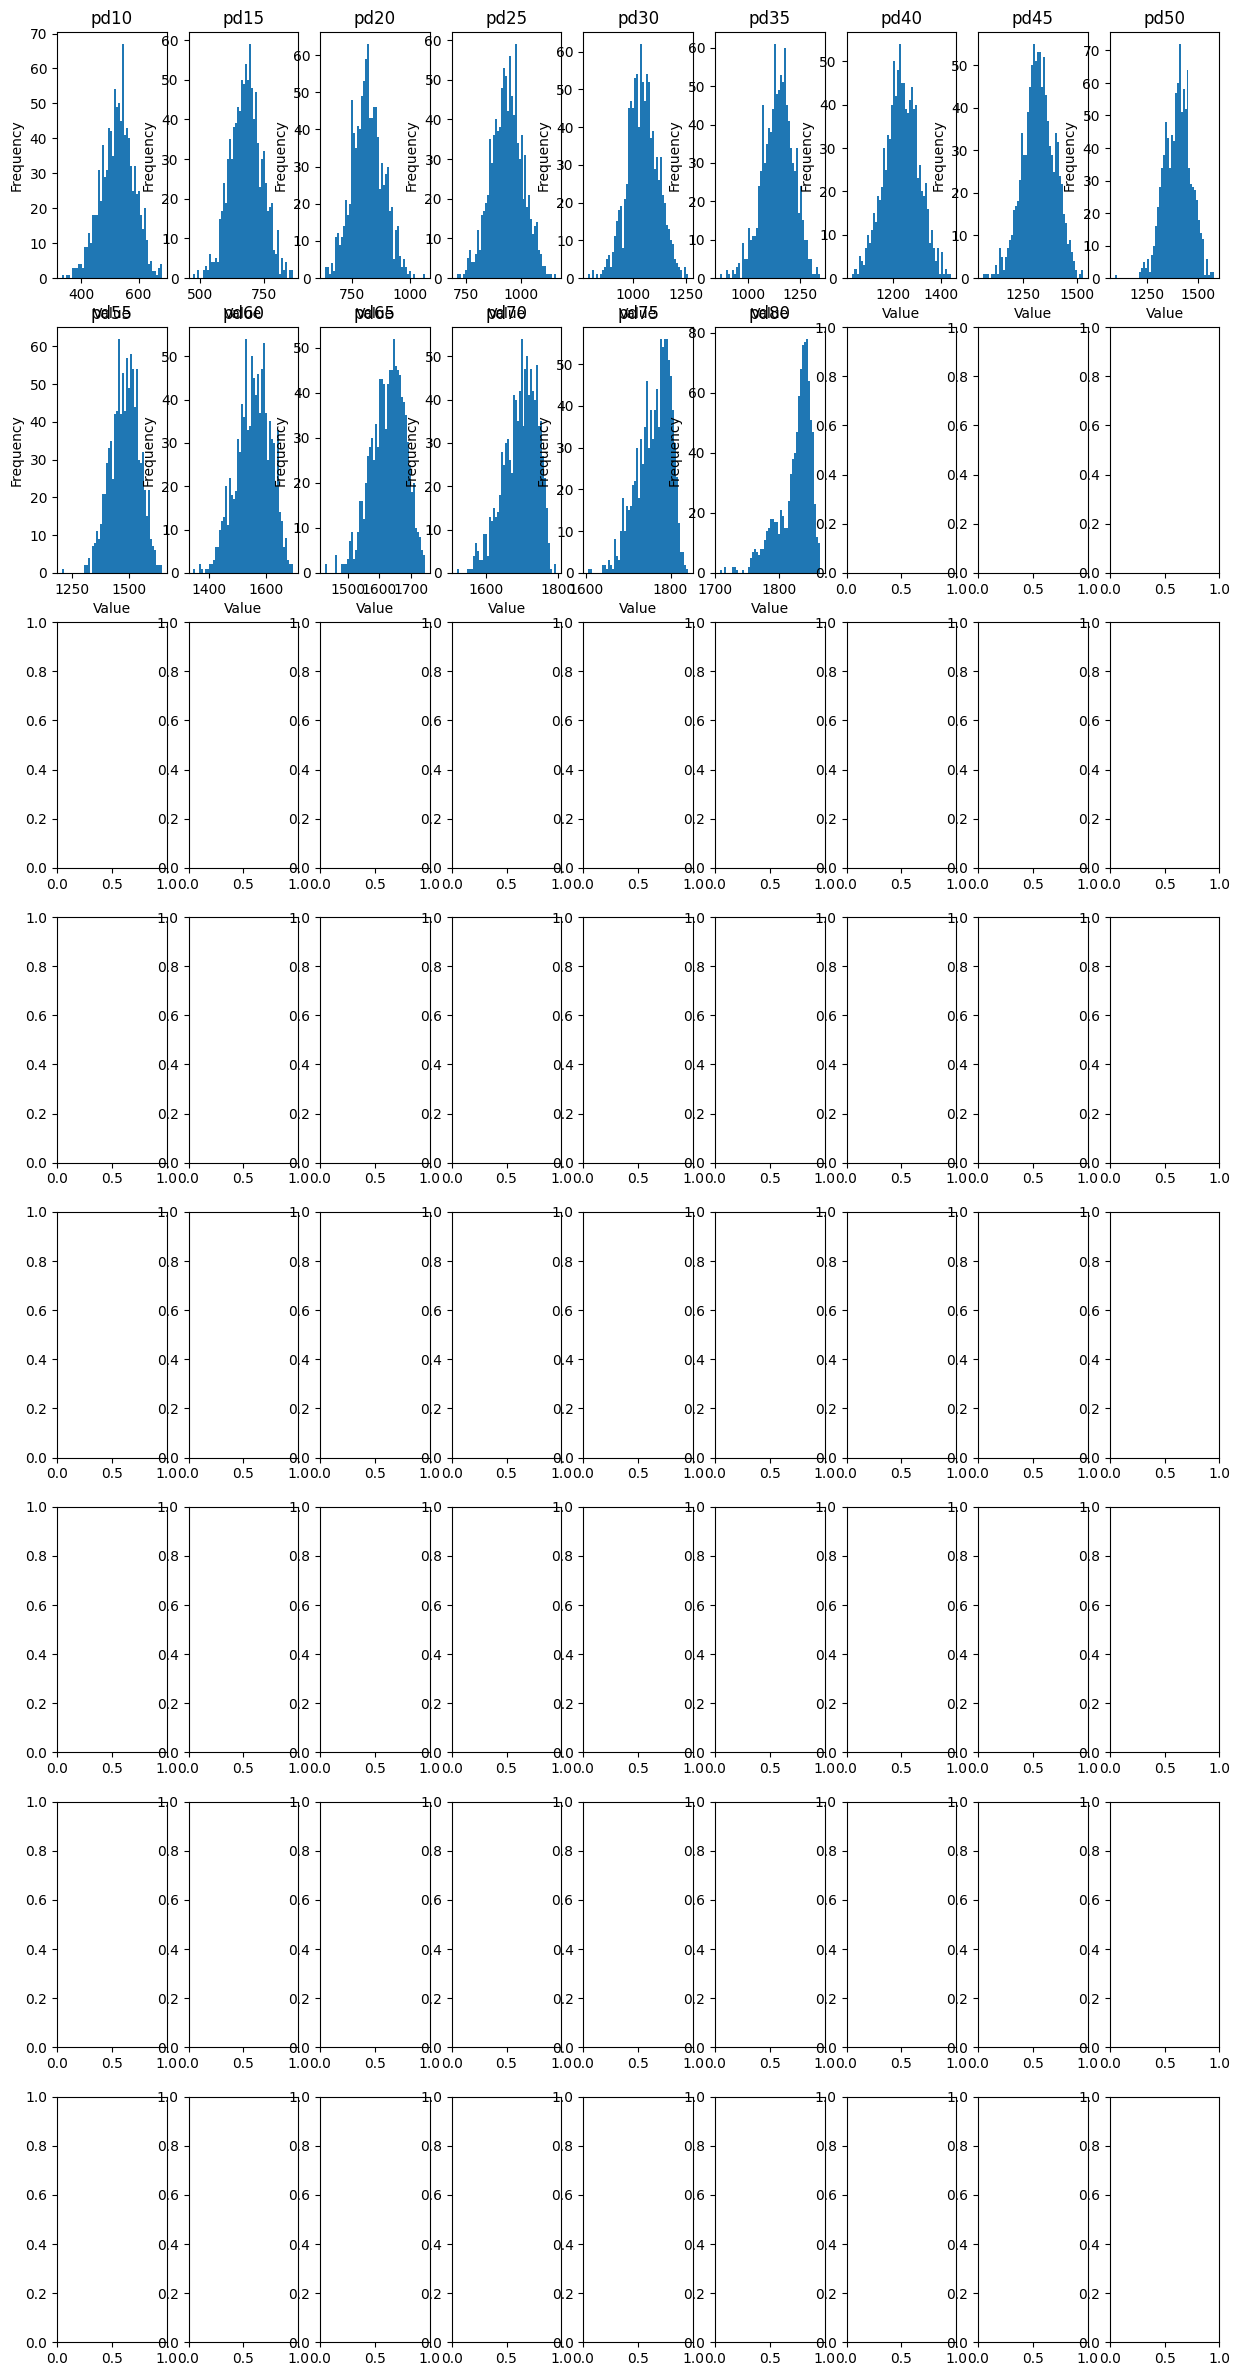

In [98]:
# Define the number of rows and columns for the grid
num_rows = 8  # Number of rows (for each pd)
num_cols = 9   # Number of columns (for each pd)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 30))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each pd and create a histogram in the corresponding subplot
for i, pd_value in enumerate(range(10, 700, 5)):
    axs[i].hist(new_pd[f'pd{pd_value}'], bins=50)
    axs[i].set_title(f'pd{pd_value}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

plt.draw()
# Save the plot as an image file
save_directory = 'birds/histograms_grid_ecoregion_pd'+ ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()


#this is for all of california. 

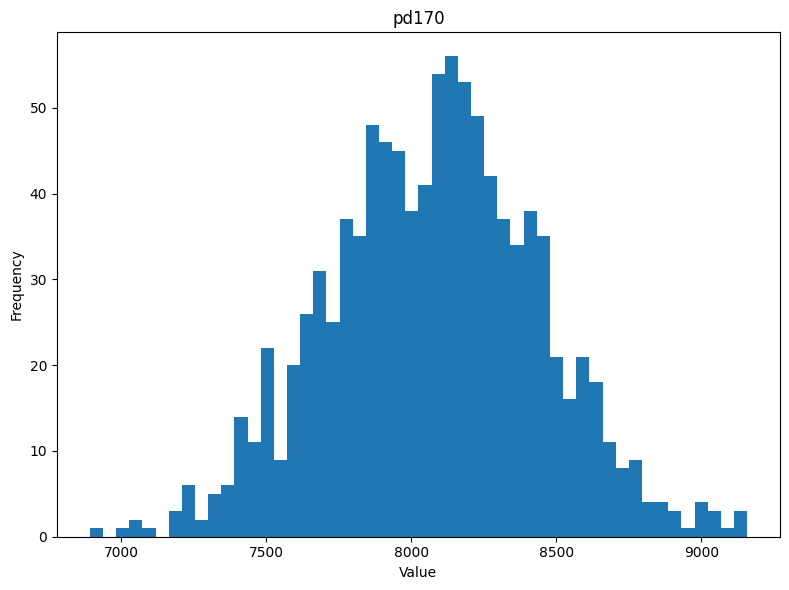

In [427]:
import matplotlib.pyplot as plt

# Filter the data to include only pd170
pd170_data = new_pd['pd170']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram for pd170
ax.hist(pd170_data, bins=50)

# Set plot title and labels
ax.set_title('pd170')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save the plot as an image file
save_directory = 'birds/histogram_pd170_ecoregion_pd_species_leve' + ecoregion_code + '.png'
plt.savefig(save_directory)

# Show the plot
plt.show()

In [17]:


#can use values instead of dictionary[key]
#CI conglomerate seems to not have too much function
#this is classical statistics and does NOT represent the data properly. 

#def CI_conglomerate(dictionary): #assuming normal distribution
#    #checks for nans
#    #dictionary = {key: value for key, value in dictionary.items() if not any(np.isnan(value))}
#    low_array = []
#    high_array = []
#    mean_array = []
#    for key, values in dictionary.keys():
#        print(key)
#        mean_temp = np.mean(dictionary[key])
#        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
#        low_array.append(CI_temp[0])
#        high_array.append(CI_temp[1])
#        mean_array.append(mean_temp)
#    return(low_array,high_array,mean_array)

#new_CI = CI_conglomerate(new_mpd)
#print(new_CI)

#issue: have some nan values. 

In [21]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        #print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        #print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [22]:
#could definitely do this in a much much much much much cleaner and better way. 
def quantile_bootstrap(dictionary): #assuming normal distribution
    low_25_array =[]
    low_10_array =[]
    low_5_array = []
    low_2point5_array = []
    low_2_array = []
    low_1point5_array = []
    low_1_array = []
    low_point5_array = []
    high_25_array =[]
    high_10_array =[]
    high_5_array = []
    high_2point5_array = []
    high_2_array = []
    high_1_array = []
    high_1point5_array = []
    high_point5_array = []
    med_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        low_25 = np.percentile(data_temp, 25.0)
        low_10 = np.percentile(data_temp, 10.0)
        low_5 = np.percentile(data_temp, 5.0)
        low_2point5 = np.percentile(data_temp, 2.5)
        low_2 = np.percentile(data_temp, 2)
        low_1point5 = np.percentile(data_temp, 1.5)
        low_1 = np.percentile(data_temp, 1)
        low_point5 = np.percentile(data_temp,0.5)
        high_25 = np.percentile(data_temp, 75.0)
        high_10 = np.percentile(data_temp, 90.0)
        high_5 = np.percentile(data_temp, 95.0)
        high_2point5 = np.percentile(data_temp, 97.5)
        high_2 = np.percentile(data_temp, 98)
        high_1point5 = np.percentile(data_temp,98.5)
        high_1 = np.percentile(data_temp, 99)
        high_point5 = np.percentile(data_temp, 99.5)
        low_25_array.append(low_25)
        low_10_array.append(low_10)
        low_5_array.append(low_5)
        low_2point5_array.append(low_2point5)
        low_2_array.append(low_2)
        low_1point5_array.append(low_1point5)
        low_1_array.append(low_1)
        low_point5_array.append(low_point5)
        high_25_array.append(high_25)
        high_10_array.append(high_10)
        high_5_array.append(high_5)
        high_2point5_array.append(high_2point5)
        high_2_array.append(high_2)
        high_1point5_array.append(high_1point5)
        high_1_array.append(high_1)
        high_point5_array.append(low_point5)

        med_array.append(np.percentile(data_temp, 50)) #median value.
        mean_array.append(np.mean(data_temp))
    
    return(low_point5_array, low_1_array, low_1point5_array, low_2_array, low_2point5_array, low_5_array,low_10_array,low_25_array, high_25_array, high_10_array, high_2point5_array, high_2_array, high_1point5_array, high_1_array, high_point5_array, med_array, mean_array)



In [23]:
#cleaner version of quantiles function 
def quantile_bootstrap_clean(dictionary): 
    data = {}
    for key in dictionary.keys():
        data_temp = dictionary[key]
        quantiles = [0.5, 1, 1.5, 2, 2.5, 5, 10, 25, 75, 90, 97.5, 98, 98.5, 99, 99.5]
        percentiles = {q: np.percentile(data_temp, q) for q in quantiles}
        percentiles['Median'] = np.percentile(data_temp, 50)
        percentiles['Mean'] = np.mean(data_temp)
        data[key] = percentiles

    return pd.DataFrame(data)

In [427]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

print(CI_mntd_bootstrap)
#seems like size of 55 throws an error. 

([26.569311145, 27.304727215, 26.3752936225, 23.95335605, 23.12510803916667, 22.680844215714327, 21.677586278125002, 20.3959844677778, 19.620025971, 18.955540120000038, 18.519103637499967, 17.867581902307663, 17.303085099999986, 17.13766240399997, 16.5466406415625, 15.9948786914706, 15.6823051311111, 15.513716971578923, 15.2047531565, 14.80443305047619, 14.703179359772683, 14.389428702826082, 14.088312634166636, 13.8061375958, 13.498765770192263, 13.366752729074035, 13.282582668928573, 13.183444020689667, 13.018675698333364, 12.830980895000001, 12.557198484843749, 12.56632117500003, 12.4240636252941, 12.341464666285715, 12.208986120833345, 12.146693788783821, 12.035558853289443, 11.937368312435932, 11.850167090500001, 11.740641986951195, 11.79555844749999, 11.65520644209305, 11.569401385909071, 11.549390808222201, 11.55195014206521, 11.500787980212777, 11.492330270729166, 11.523593009489796, 11.572455952499999], [82.5193991325, 65.16376258999996, 55.6379048, 49.618151543, 44.0922978033

In [428]:
quantile_mpd_bootstrap = quantile_bootstrap(new_mpd) #CI for mpd

quantile_mntd_bootstrap = quantile_bootstrap(new_mntd) #CI for mpd

quantile_pd_bootstrap = quantile_bootstrap(new_pd) #CI for mpd


#need to expor these quantile data as csvs 

In [429]:
quantile_mpd_bootstrap_clean = quantile_bootstrap_clean(new_mpd)

quantile_mntd_bootstrap_clean = quantile_bootstrap_clean(new_mntd)

quantile_pd_bootstrap_clean = quantile_bootstrap_clean(new_pd)

              pd10        pd15        pd20        pd25        pd30  \
0.5     225.623268  327.677064  445.383354  524.079318  590.227413   
1       247.466321  338.598792  455.206335  532.897700  621.317081   
1.5     251.911742  344.983619  460.297460  543.799522  631.946429   
2       260.314099  350.266517  472.062962  555.225593  644.701085   
2.5     264.688132  356.854811  477.261362  558.447483  648.159253   
5       282.589421  378.657484  496.593743  579.878082  668.943932   
10      297.596587  406.249231  519.528367  601.934608  690.678461   
25      330.253265  450.727941  554.999819  645.700392  738.710987   
75      407.161825  534.713584  640.852985  740.598799  831.436901   
90      435.599762  569.567991  679.121577  784.055688  870.350573   
97.5    469.200694  609.519874  714.056400  827.561382  915.311203   
98      473.267769  618.106590  726.040092  833.363371  921.938413   
98.5    478.865702  626.931044  736.559341  838.928671  924.217803   
99      484.032241  

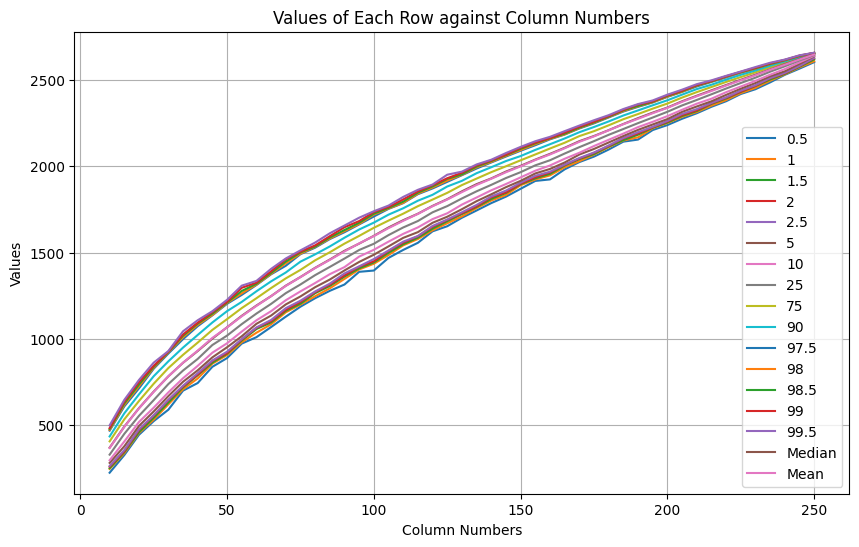

In [430]:
print(quantile_pd_bootstrap_clean)
plt.figure(figsize=(10, 6))
for index, row in quantile_pd_bootstrap_clean.iterrows():
    plt.plot([int(col[2:]) for col in quantile_pd_bootstrap_clean.columns], row, label=index)

plt.xlabel('Column Numbers')
plt.ylabel('Values')
plt.title('Values of Each Row against Column Numbers')
plt.legend()
plt.grid(True)
plt.show()

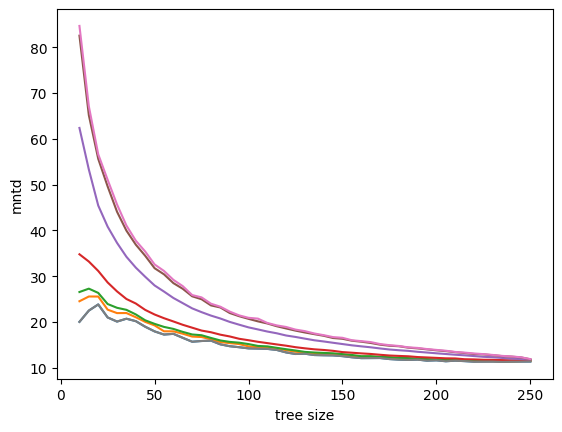

In [431]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mntd_bootstrap)-1):
    if i % 2 == 0:
        plt.plot(tree_sizes, quantile_mntd_bootstrap[i])

labels2 = ("low", "high", "mean")
plt.ylabel("mntd")
plt.xlabel("sample size")
plt.xlabel('tree size')

plt.savefig(os.path.join(save_directory, '0507_mntd_95CI.jpg'), dpi=1200)
plt.show()

In [109]:
print(os.path.join(save_directory, 'species_mntd_95CI.jpg'))

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/Plants/ecoregion_data/9/species_mntd_95CI.jpg


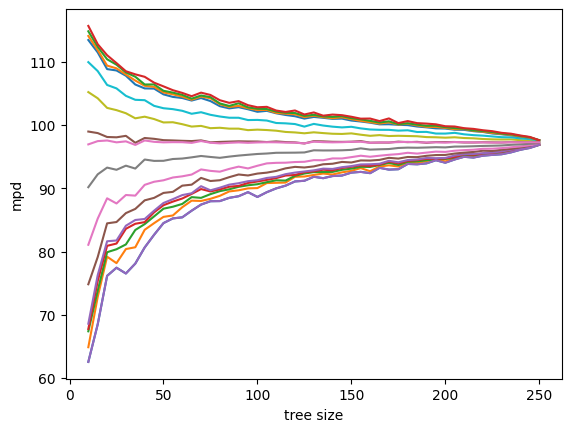

In [432]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mpd_bootstrap)):
    plt.plot(tree_sizes, quantile_mpd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, '0507_mpd_95CI.jpg'), dpi=1200)
plt.show()

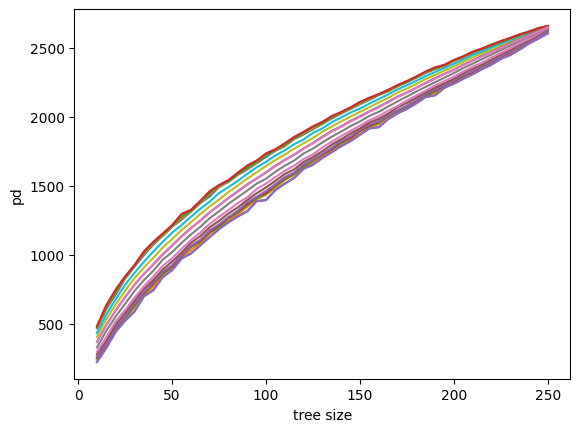

In [433]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_pd_bootstrap)):
    plt.plot(tree_sizes, quantile_pd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, '0507_pd_95CI.jpg'), dpi=1200)
plt.show()

In [ ]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

#os.listdir(target_directory)

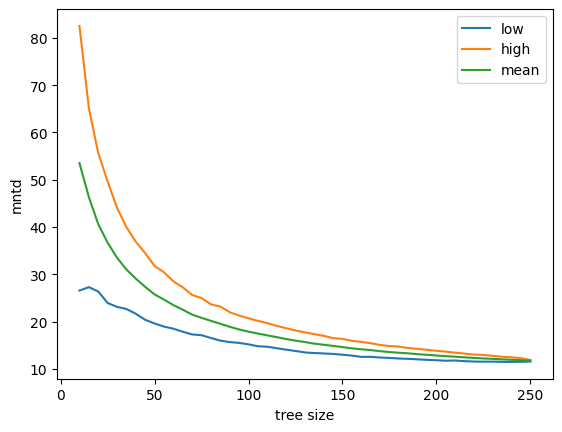

In [434]:
#print(average_mpd_rnd)
plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, '0507_mntd_95CI.jpg'), dpi=1200)


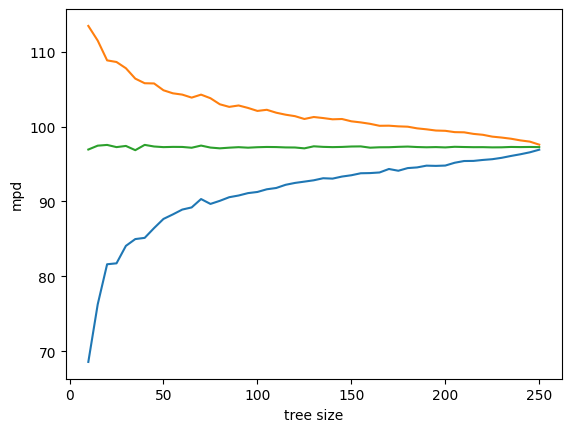

In [435]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, '0507_mpd_95CI.jpg'), dpi=1200)


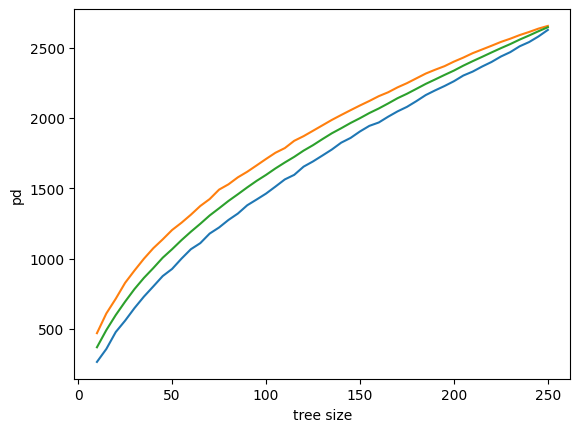

In [436]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, '0507_pd_95CI.jpg'), dpi=1200)



In [437]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_mpd_output_bootstrap.csv"))


In [438]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "CI_mntd_output_bootstrap.csv"))

In [439]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_pd_output_bootstrap.csv"))

In [440]:

quantile_export_mpd = pd.DataFrame(quantile_mpd_bootstrap_clean)
quantile_export_mpd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mpd_output_bootstrap.csv"))

quantile_export_mntd = pd.DataFrame(quantile_mntd_bootstrap_clean)
quantile_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mntd_output_bootstrap.csv"))

quantile_export_pd = pd.DataFrame(quantile_pd_bootstrap_clean)
quantile_export_pd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_pd_output_bootstrap.csv"))

